### MOVIE INDUSTRY EXPLORATORY DATA ANALYSIS

### Objectives:
### Menganalisis industri film untuk memperoleh hasil analisis film dengan profit paling besar untuk membuat rekomendasi yang dapat ditindaklanjuti bagi perusahaan untuk memasuki industri perfilman.

#### Mengimpor libraries dan dataset

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [3]:
#Setting the default style for plots
plt.style.use('ggplot')

from matplotlib.pyplot import figure
plt.rcParams['figure.figsize'] = (12,8)

%matplotlib inline

In [4]:
movie_dates_df = pd.read_csv('movie_release_dates.csv', index_col=0)
theaters_df = pd.read_csv('movie_theater_data.csv', index_col=0)
awards_df = pd.read_csv('movie_awards.csv', index_col=0)
actors_df = pd.read_csv('Actors_Table.csv')
directors_df = pd.read_csv('Directors_Table.csv')
imdb_base_df = pd.read_csv('IMDb_base.csv')
imdb_budgets_df = pd.read_csv('IMDb_budgets.csv')
studio_df = pd.read_csv('studiodf.csv')

In [5]:
#Menghapus film yang memiliki domestic gross $0.
imdb_budgets_df = imdb_budgets_df[imdb_budgets_df['Domestic Gross'] !=0]

#### Meninjau data teratas setiap dataset untuk mengetahui data apa yang sedang kami kerjakan.

In [6]:
imdb_budgets_df.head()

,Movie,Year,IMDb,Rating,Runtime,Genre,Release Date,Production Budget,Domestic Gross,Worldwide Gross
0,Avengers: Endgame,2019,8.4,PG-13,181,"Action, Adventure, Drama","Apr 23, 2019",400000000,858373000,2797800564
1,Avatar,2009,7.8,PG-13,162,"Action, Adventure, Fantasy","Dec 17, 2009",237000000,760507625,2788701337
2,Black Panther,2018,7.3,PG-13,134,"Action, Adventure, Sci-Fi","Feb 13, 2018",200000000,700059566,1346103376
3,Avengers: Infinity War,2018,8.4,PG-13,149,"Action, Adventure, Sci-Fi","Apr 25, 2018",300000000,678815482,2048359754
4,Titanic,1997,7.8,PG-13,194,"Drama, Romance","Dec 18, 1997",200000000,659363944,2208208395


In [7]:
movie_dates_df.head()

,movie,release_date,release_month,release_day,release_year
0,Metropolis,1927-03-06,March,Sunday,1927
1,"Dr. Mabuse, the Gambler",1927-08-08,August,Monday,1927
2,The Unknown,1927-06-03,June,Friday,1927
3,The Jazz Singer,1927-10-06,October,Thursday,1927
4,Chicago,1927-12-23,December,Friday,1927


In [8]:
theaters_df.head()

,title,max_theaters,year,total_dom_gross($),studio
0,The Lion King,4802,2019,543638043,Disney
1,Avengers: Endgame,4662,2019,858373000,Disney
2,Spider-Man: Far from Home,4634,2019,390532085,Sony
3,Toy Story 4,4575,2019,434038008,Disney
4,It Chapter Two,4570,2019,211593228,Warner Bros.


In [9]:
actors_df.head()

,Movie,Year,value,Release Date,Production Budget,Domestic Gross,Worldwide Gross
0,Avengers: Endgame,2019,Robert Downey Jr.,"Apr 23, 2019",400000000,858373000,2797800564
1,Avengers: Endgame,2019,Chris Evans,"Apr 23, 2019",400000000,858373000,2797800564
2,Avengers: Endgame,2019,Mark Ruffalo,"Apr 23, 2019",400000000,858373000,2797800564
3,Avengers: Endgame,2019,Chris Hemsworth,"Apr 23, 2019",400000000,858373000,2797800564
4,Avatar,2009,Sam Worthington,"Dec 17, 2009",237000000,760507625,2788701337


In [10]:
directors_df.head()

,Movie,Year,value,Release Date,Production Budget,Domestic Gross,Worldwide Gross
0,Avengers: Endgame,2019,Joe Russo,"Apr 23, 2019",400000000,858373000,2797800564
1,Avengers: Endgame,2019,Anthony Russo,"Apr 23, 2019",400000000,858373000,2797800564
2,Avatar,2009,James Cameron,"Dec 17, 2009",237000000,760507625,2788701337
3,Black Panther,2018,Ryan Coogler,"Feb 13, 2018",200000000,700059566,1346103376
4,Avengers: Infinity War,2018,Joe Russo,"Apr 25, 2018",300000000,678815482,2048359754


In [11]:
imdb_base_df.head()

,Movie,Year,IMDb,Rating,Runtime,Genre
0,Star Wars: Episode VII - The Force Awakens,2015,7.9,PG-13,138,"Action, Adventure, Sci-Fi"
1,Avengers: Endgame,2019,8.4,PG-13,181,"Action, Adventure, Drama"
2,Avatar,2009,7.8,PG-13,162,"Action, Adventure, Fantasy"
3,Black Panther,2018,7.3,PG-13,134,"Action, Adventure, Sci-Fi"
4,Avengers: Infinity War,2018,8.4,PG-13,149,"Action, Adventure, Sci-Fi"


In [12]:
studio_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,Buena Vista,415000000.0,652000000,2010
1,Alice in Wonderland (2010),Buena Vista,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,Pixar/Dreamworks,238700000.0,513900000,2010


### Film apakah yang memiliki profit terbesar dan seberapa banyak dana yang dibutuhkan?

Kami mendefinisikan profit sebagai Worldwide Gross - Biaya Produksi.

Kami akan membuat anggaran yang disesuaikan dengan memperhitungkan nilai inflasi, sehingga keuntungan yang diperolehpun akan mengikuti nilai inflasi di masa yang akan datang.

Kami menggunakan nilai inflasi sebesar 3,22%.

In [13]:
imdb_budgets_df['Profit'] = imdb_budgets_df['Worldwide Gross'] - imdb_budgets_df['Production Budget']

imdb_budgets_df['Profit_Margin'] = (imdb_budgets_df['Worldwide Gross'] - 
                                    imdb_budgets_df['Production Budget'])/imdb_budgets_df['Worldwide Gross']

In [14]:
imdb_budgets_df['Adjusted_Budget'] = ((((2020-imdb_budgets_df['Year'])*.0322)+1)*
                                      imdb_budgets_df['Production Budget'])

#Suppressing Scienific Notation
pd.options.display.float_format = '{:.2f}'.format

imdb_budgets_df['Adjusted_Profit'] = (((2020-imdb_budgets_df['Year'])*.0322)+1)*imdb_budgets_df['Profit']
imdb_budgets_df.head()

,Movie,Year,IMDb,Rating,Runtime,Genre,Release Date,Production Budget,Domestic Gross,Worldwide Gross,Profit,Profit_Margin,Adjusted_Budget,Adjusted_Profit
0,Avengers: Endgame,2019,8.40,PG-13,181,"Action, Adventure, Drama","Apr 23, 2019",400000000,858373000,2797800564,2397800564,0.86,412880000.00,2475009742.16
1,Avatar,2009,7.80,PG-13,162,"Action, Adventure, Fantasy","Dec 17, 2009",237000000,760507625,2788701337,2551701337,0.92,320945400.00,3455513950.57
2,Black Panther,2018,7.30,PG-13,134,"Action, Adventure, Sci-Fi","Feb 13, 2018",200000000,700059566,1346103376,1146103376,0.85,212880000.00,1219912433.41
3,Avengers: Infinity War,2018,8.40,PG-13,149,"Action, Adventure, Sci-Fi","Apr 25, 2018",300000000,678815482,2048359754,1748359754,0.85,319320000.00,1860954122.16
4,Titanic,1997,7.80,PG-13,194,"Drama, Romance","Dec 18, 1997",200000000,659363944,2208208395,2008208395,0.91,348120000.00,3495487532.34


Untuk menentukan film - film yang memiliki nilai profit yang tinggi, kami akan membuat dataframe terpisah yaitu profitable_movies_df dimana kolom profit bernilai lebih besar dari 0. 

Selanjutnya kami mengurutkan ranking film untuk memberi peringkat film - film yang memiliki profit paling besar.   

In [15]:
profitable_movies_df = imdb_budgets_df.loc[imdb_budgets_df['Profit'] > 0]
profitable_ranked_df = profitable_movies_df.sort_values(by=['Adjusted_Profit'], ascending=False)
profitable_ranked_df.reset_index(inplace=True) #Modify the DataFrame in place (do not create a new object).
profitable_ranked_df.head()

,index,Movie,Year,IMDb,Rating,Runtime,Genre,Release Date,Production Budget,Domestic Gross,Worldwide Gross,Profit,Profit_Margin,Adjusted_Budget,Adjusted_Profit
0,4,Titanic,1997,7.80,PG-13,194,"Drama, Romance","Dec 18, 1997",200000000,659363944,2208208395,2008208395,0.91,348120000.00,3495487532.34
1,1,Avatar,2009,7.80,PG-13,162,"Action, Adventure, Fantasy","Dec 17, 2009",237000000,760507625,2788701337,2551701337,0.92,320945400.00,3455513950.57
2,0,Avengers: Endgame,2019,8.40,PG-13,181,"Action, Adventure, Drama","Apr 23, 2019",400000000,858373000,2797800564,2397800564,0.86,412880000.00,2475009742.16
3,3,Avengers: Infinity War,2018,8.40,PG-13,149,"Action, Adventure, Sci-Fi","Apr 25, 2018",300000000,678815482,2048359754,1748359754,0.85,319320000.00,1860954122.16
4,28,Jurassic Park,1993,8.10,PG-13,127,"Action, Adventure, Sci-Fi","Jun 11, 1993",63000000,402523348,1045627627,982627627,0.94,117772200.00,1836924085.91


Setelah memperoleh hasil analisis film dengan profit yang besar, selanjutnya mari kita lihat anggaran vs keuntungan yang telah disesuaikan dengan inflasi untuk setiap film dalam dataframe.

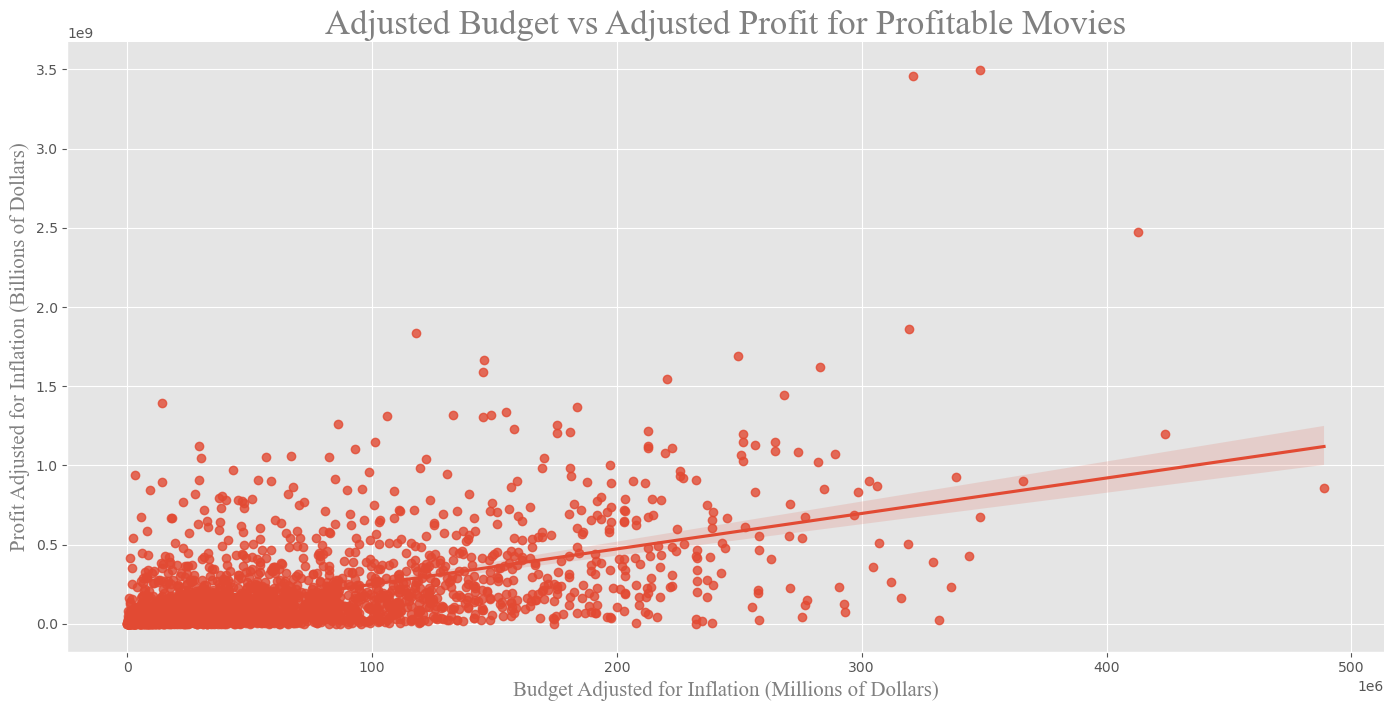

In [16]:
ax1 = sns.lmplot(x='Adjusted_Budget', y='Adjusted_Profit', data=profitable_ranked_df, height=7, aspect=2)
plt.xlabel('Budget Adjusted for Inflation (Millions of Dollars)', fontdict = {'fontname': 'Times New Roman', 'color': 'gray', 'fontsize' : '15'})
#setting x-axis label 
plt.ticklabel_format(axis='x', style='sci', scilimits=(6,6))
plt.ylabel('Profit Adjusted for Inflation (Billions of Dollars)',fontdict = {'fontname': 'Times New Roman', 'color': 'gray', 'fontsize' : '15'})
plt.title('Adjusted Budget vs Adjusted Profit for Profitable Movies', fontdict = {'fontname': 'Times New Roman', 'color': 'gray', 'fontsize' : '25'})
plt.savefig('BudgetVProfit', dpi = 300);

Scatter Plot di atas berfungsi untuk memahami berapa banyak budget yang harus dianggarkan untuk sebuah film. positive trend line menunjukkan bahwa peningkatan anggaran akan mengakibatkan peningkatan keuntungan.

Mari kita lihat film-film paling sukses sehingga kita bisa mendapatkan gambaran yangblebih baik tentang berapa anggaran yang seharusnya dikeluarkan oleh perusahaan.

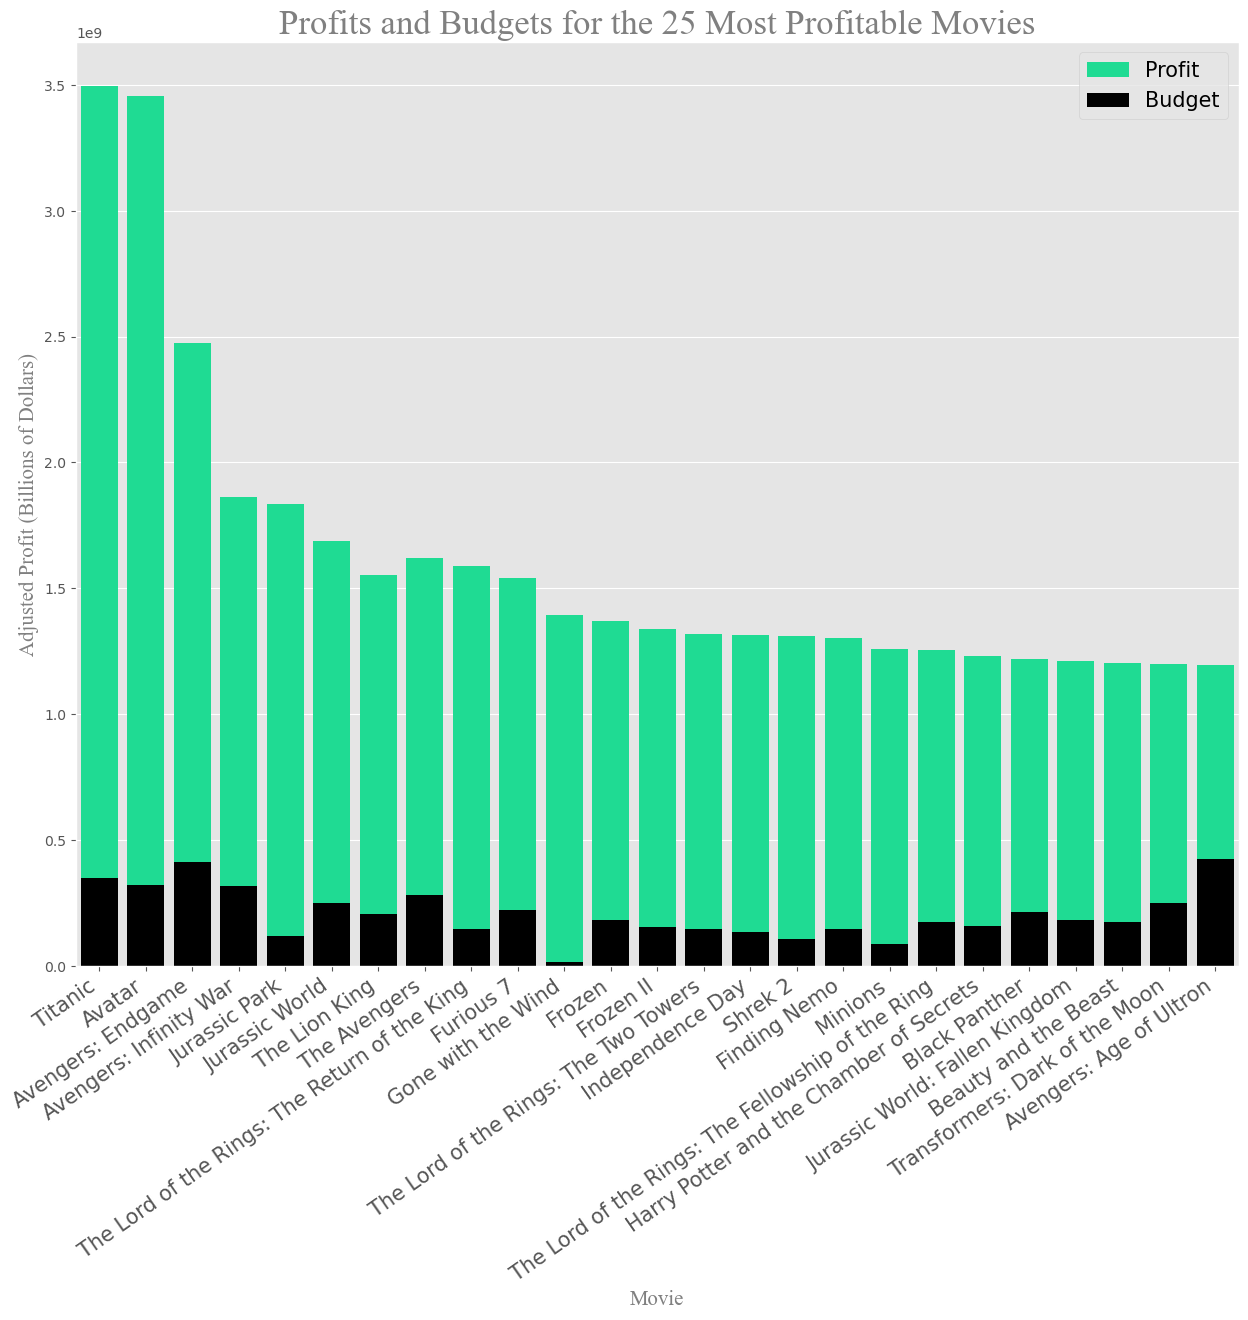

In [18]:
plt.figure(figsize=(15,12))
sns.barplot(x=profitable_ranked_df.loc[0:25, 'Movie'],y=profitable_ranked_df.loc[0:25, 'Adjusted_Profit'], 
            color='mediumspringgreen', label='Profit', ci=None)
sns.barplot(x=profitable_ranked_df.loc[0:25, 'Movie'],y=profitable_ranked_df.loc[0:25, 'Adjusted_Budget'], 
            color='black', label='Budget', ci=None)
plt.xlabel('Movie', fontdict = {'fontname': 'Times New Roman', 'color': 'gray', 'fontsize' : '15'})
plt.title("Profits and Budgets for the 25 Most Profitable Movies", fontdict = {'fontname': 'Times New Roman', 'color': 'gray', 'fontsize' : '25'})
plt.ylabel('Adjusted Profit (Billions of Dollars)', fontdict = {'fontname': 'Times New Roman', 'color': 'gray', 'fontsize' : '15'})
plt.xticks(rotation=35, horizontalalignment='right', fontsize=15)
plt.legend(loc='best', fontsize=15)
plt.savefig('ProfitBudgetTop25', dpi=300);

In [19]:
profitable_movies_df['Adjusted_Budget'].describe()

count        2836.00
mean     60689139.20
std      63199464.86
min         10606.40
25%      16608850.00
50%      38684100.00
75%      82247150.00
max     488834200.00
Name: Adjusted_Budget, dtype: float64

In [20]:
profitable_movies_df.loc[0:24, 'Adjusted_Budget'].describe()

count          25.00
mean    242777774.40
std      80698866.89
min     106064000.00
25%     180635000.00
50%     225760000.00
75%     282960000.00
max     423765000.00
Name: Adjusted_Budget, dtype: float64

In [21]:
profitable_movies_df['Profit_Margin'].describe()

count   2836.00
mean       0.62
std        0.24
min        0.00
25%        0.47
50%        0.67
75%        0.81
max        1.00
Name: Profit_Margin, dtype: float64

In [22]:
profitable_movies_df.loc[0:24, 'Profit_Margin'].describe()

count   25.00
mean     0.85
std      0.05
min      0.74
25%      0.81
50%      0.85
75%      0.87
max      0.93
Name: Profit_Margin, dtype: float64

In [23]:
len(profitable_ranked_df.loc[profitable_ranked_df['Profit_Margin'] > 0.5])

2041

Dapat dilihat bahwa 25 film paling sukses memiliki keuntungan dan margin keuntungan yang luar biasa. Titanic (1997), Avatar, dan Avengers: Endgame adalah film paling sukses dalam hal keuntungan semata.

Jadi bagaimana kita tahu apa yang harus dibelanjakan? Kita perlu memikirkan margin keuntungan seperti apa yang ingin kita lihat. 2043 dari 2841 total film yang menghasilkan keuntungan memiliki margin keuntungan lebih dari 50%. Hal ini merupakan kabar baik karena ini menunjukkan bahwa kita bisa lebih agresif dalam memilih ambang batas margin keuntungan. 

25 Film teratas memiliki margin keuntungan rata - rata pada 84,9% dengan rata - rata anggaran 225.760.000. Saat melihat film yang menguntungkan, margin keuntungan turun secara signifikan menjadi 67,1% dan anggaran turun secara signifikan menjadi $ 38.676.000.

kami menggunakan median untuk mendeskripsikan data kami karena mean akan dipengaruhi oleh outlier.

In [24]:
filtered_df = profitable_ranked_df.loc[(profitable_ranked_df['Profit_Margin'] >= 0.75) & 
                         (profitable_ranked_df['Adjusted_Budget'] > 38676000)]
len(filtered_df)

374

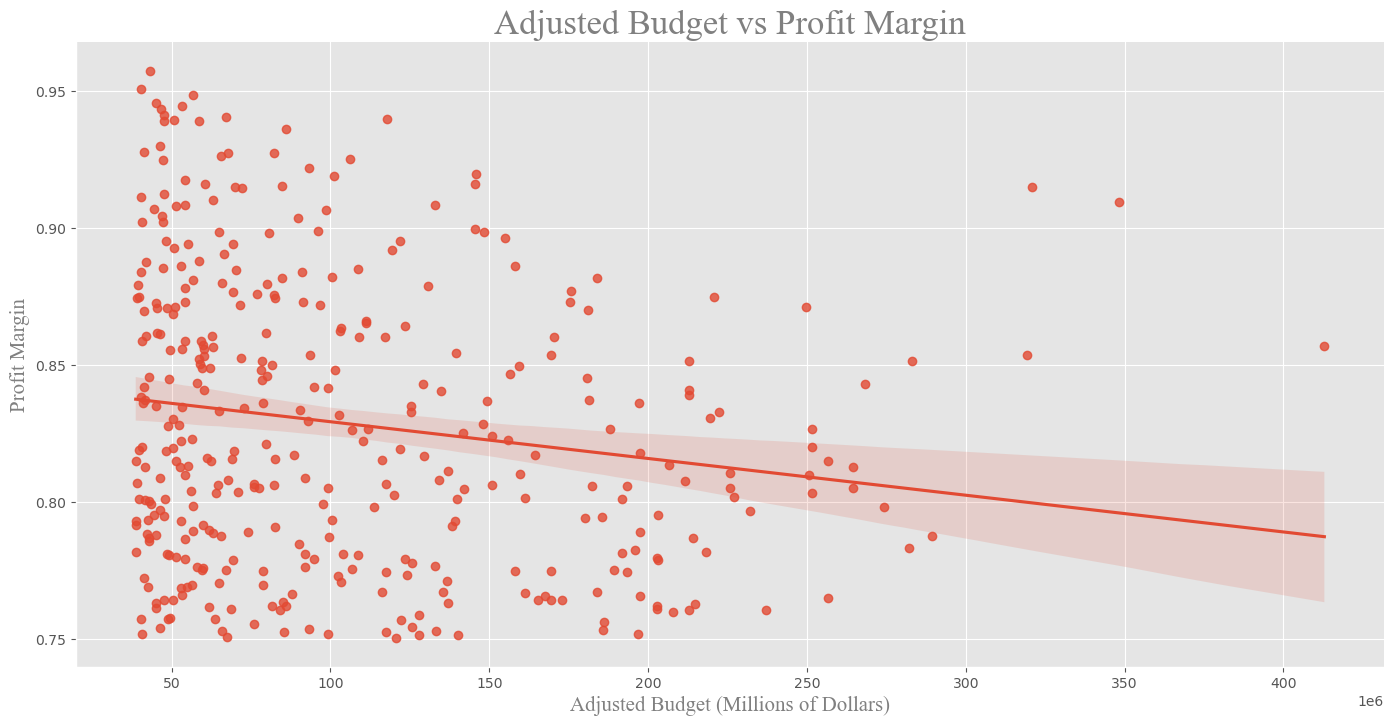

In [25]:
ax2 = sns.lmplot(x='Adjusted_Budget', y='Profit_Margin', data=filtered_df, height=7, aspect=2)
plt.xlabel('Adjusted Budget (Millions of Dollars)', fontdict = {'fontname': 'Times New Roman', 'color': 'gray', 'fontsize' : '15'})
plt.ticklabel_format(axis='x', style='sci', scilimits=(6,6))
plt.ylabel('Profit Margin', fontdict = {'fontname': 'Times New Roman', 'color': 'gray', 'fontsize' : '15'})
plt.title('Adjusted Budget vs Profit Margin', fontdict = {'fontname': 'Times New Roman', 'color': 'gray', 'fontsize' : '25'})
plt.savefig('BudgetVMargin', dpi=300);

In [26]:
filtered_df.describe()

,index,Year,IMDb,Runtime,Production Budget,Domestic Gross,Worldwide Gross,Profit,Profit_Margin,Adjusted_Budget,Adjusted_Profit
count,374.00,374.00,374.00,374.00,374.00,374.00,374.00,374.00,374.00,374.00,374.00
mean,391.53,2004.97,7.01,118.60,77814178.13,193378841.67,484994903.63,407180725.50,0.83,105858522.51,562879114.94
std,378.20,10.81,0.90,24.02,57570152.51,127088965.57,377690264.14,329994078.69,0.05,66272237.80,413114307.71
min,0.00,1956.00,3.30,79.00,13500000.00,19019882.00,69995385.00,54995385.00,0.75,38685000.00,123209844.42
25%,111.25,1998.00,6.40,100.00,35000000.00,106948347.75,217288435.75,176354400.25,0.78,53471100.00,274861614.08
50%,279.50,2007.00,7.00,116.00,55000000.00,162801999.50,350937609.00,299062980.00,0.82,82249300.00,449229900.01
75%,550.50,2014.00,7.70,131.75,100000000.00,242081446.50,636084264.50,513979301.75,0.87,139654600.00,719591073.46
max,2424.00,2020.00,9.00,228.00,400000000.00,858373000.00,2797800564.00,2551701337.00,0.96,412880000.00,3495487532.34


Kami memeriksa kembali data dalam plot sebar untuk melihat apakah kami dapat menentukan tren. 

Data kami lebih tersebar ketika membandingkan margin keuntungan dan anggaran. Trend Line dalam plot ini adalah negatif yang memperingatkan kita agar tidak menghabiskan terlalu banyak uang karena berpotensi merugikan margin keuntungan kita. 

Melihat data yang difilter, kami memiliki anggaran median sebesar $82.249.300 dan margin keuntungan median sebesar 81,9%.

Kesimpulan: Kami merekomendasikan agar Perusahaan kita menganggarkan sekitar $82.250.000 untuk membuat sebuah film. Hal ini harus berkorelasi dengan margin keuntungan di atas 80%.